In [1]:
# Test the function
street_name = "MANOR RD"
_from = "LINCOLN ST"
_to = "CROAK AVE"
date = "01/13/2024"
time = "6:00-7:00AM"

In [26]:
import pandas as pd

# Load dataset
df = pd.read_csv('traffic_data.csv')

# Checking for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Drop rows with any missing values
df_cleaned = df.dropna()

# Alternatively, you can also fill missing values with a specific value, such as 0
# df_cleaned = df.fillna(0)

# Checking missing values after cleaning
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())

# Saving cleaned data to a new CSV file
df_cleaned.to_csv('cleaned_traffic_data.csv', index=False)


Missing values before cleaning:
ID                 0
SegmentID          0
Street Name        0
From               0
To                 0
Date               0
12:00-1:00 AM      4
1:00-2:00AM        4
2:00-3:00AM        4
3:00-4:00AM        4
4:00-5:00AM        4
5:00-6:00AM        4
6:00-7:00AM        4
7:00-8:00AM        4
8:00-9:00AM        4
9:00-10:00AM       4
10:00-11:00AM      3
11:00-12:00PM      1
12:00-1:00PM     253
1:00-2:00PM      253
2:00-3:00PM      253
3:00-4:00PM      253
4:00-5:00PM      253
5:00-6:00PM      253
6:00-7:00PM      253
7:00-8:00PM      253
8:00-9:00PM      253
9:00-10:00PM     253
10:00-11:00PM    253
11:00-12:00AM    253
dtype: int64

Missing values after cleaning:
ID               0
SegmentID        0
Street Name      0
From             0
To               0
Date             0
12:00-1:00 AM    0
1:00-2:00AM      0
2:00-3:00AM      0
3:00-4:00AM      0
4:00-5:00AM      0
5:00-6:00AM      0
6:00-7:00AM      0
7:00-8:00AM      0
8:00-9:00AM      0
9:00-10:

ID               0
SegmentID        0
Street Name      0
From             0
To               0
Date             0
12:00-1:00 AM    0
1:00-2:00AM      0
2:00-3:00AM      0
3:00-4:00AM      0
4:00-5:00AM      0
5:00-6:00AM      0
6:00-7:00AM      0
7:00-8:00AM      0
8:00-9:00AM      0
9:00-10:00AM     0
10:00-11:00AM    0
11:00-12:00PM    0
12:00-1:00PM     0
1:00-2:00PM      0
2:00-3:00PM      0
3:00-4:00PM      0
4:00-5:00PM      0
5:00-6:00PM      0
6:00-7:00PM      0
7:00-8:00PM      0
8:00-9:00PM      0
9:00-10:00PM     0
10:00-11:00PM    0
11:00-12:00AM    0
dtype: int64
Mean Absolute Error: 0.21564470588235138
Root Mean Squared Error: 7.474708405487056


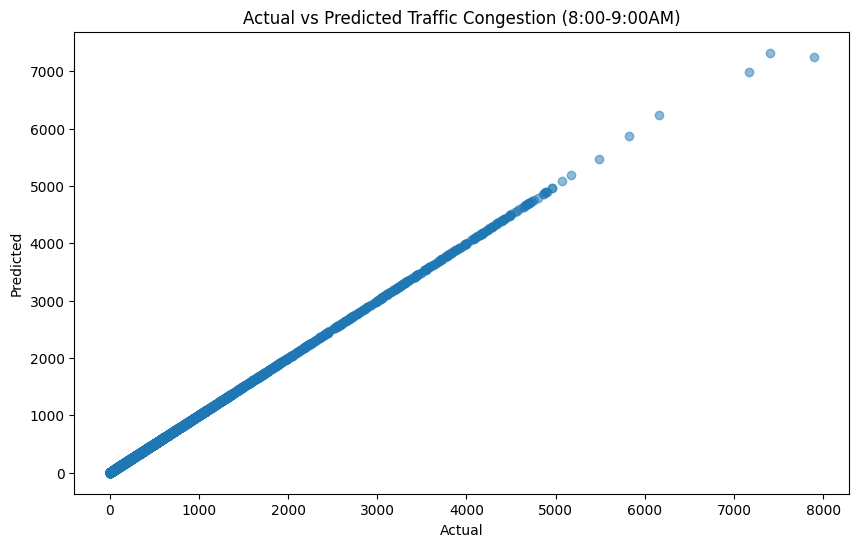

In [40]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv('cleaned_traffic_data.csv')

# Data preprocessing
# Checking for missing values
print(df.isnull().sum())

# Splitting categorical and numerical columns
categorical_cols = ['Street Name', 'From', 'To']
numerical_cols = [col for col in df.columns if col not in ['ID', 'SegmentID', 'Street Name', 'From', 'To', 'Date']]

# Pipeline for preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) # Setting unknown_value to -1
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Feature engineering
# You may need to create additional features based on domain knowledge or data analysis

# Splitting data into features and target variable
X = df.drop(['ID', 'SegmentID', 'Date'], axis=1)
y = df['8:00-9:00AM']  # Predicting traffic congestion at 8:00-9:00AM

# Dropping rows with missing target values
missing_rows = y.isnull()
X = X[~missing_rows]
y = y[~missing_rows]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Traffic Congestion (8:00-9:00AM)')
plt.show()
